<center>
    
# Assignment 1

<center>

$\textbf{1}.$ I got the data from https://github.com/karlrupp/microprocessor-trend-data/tree/master/40yrs but only ploted two of them. The first is the number of transistor per year, and the second is frecuency. With them we can see that the number of transistors in a dense integrated circuit grow over the years, and the Moore's lay said that this growth is double about every two years, and the number of mathematical operations per second is growing. Finally, the both data plots fit with an exponential function.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.ticker as mtick 

In [6]:
#Read data
t=np.loadtxt("Transistors.txt")
f=np.loadtxt("frequency.txt")
yearst = t[:,0]
datat = t[:,1]
yearsf = f[:,0]
dataf = f[:,1]

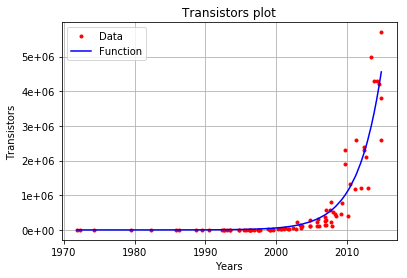

In [35]:
#Definition of exponential aproximation function
def func(x, a, b):
    return np.exp(b * (x-a)) 

popt, pcov = curve_fit(func, yearst, datat, p0=[1970,1])


#Plot of datas and aproximation function
plt.plot(yearst,datat,".",color='r',label='Transistors')
plt.plot(yearst, func(yearst,*popt), 'r-', color='blue') 
plt.grid()
plt.legend(('Data', 'Function'),
prop = {'size':10}, loc = 'best')
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
plt.xlabel('Years')
plt.ylabel('Transistors')
plt.title('Transistors plot')

plt.show()

Another way to measure the power of a computer, for example, is by the electric power consumed by CPUs and GPUs (and thus the heat generated) increases in good approximation with the cubic power of clock frequency.

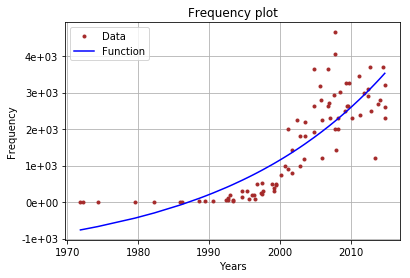

In [32]:
popt2, pcov2 = curve_fit(func, yearsf, dataf, p0=[1970,1])

#Plot of datas and aproximation function
plt.plot(yearsf,dataf,".",color='brown',label='Transistors')
plt.plot(yearsf, func(yearsf,*popt2), 'r-', color='blue') 
plt.grid()
plt.legend(('Data', 'Function'),
prop = {'size':10}, loc = 'best')
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Frequency plot')
plt.show()

Finally, the speed of a computer is measured by flops (Floating point Operations Per Second), that gives the number of computer floating operations per second. A flop is a measure of performance, and they are known as megaflop, gigaflop, teraflop. In the next plots we can see the comparition between diferent CPUs through the flops per second and the number of cores of each one. From 2007 to 2016.

This information was taked from https://www.karlrupp.net/2013/06/cpu-gpu-and-mic-hardware-characteristics-over-time/.

$\textbf{2.}$  To show the part $\textit{a).}$  we have to consider the centered differences formula of order $\textit{O}(h^2)$ gives by

$$f^{''}(x)=\dfrac{f(x+h)-2f(x)+f(x-h)}{h^2}+\textit{O}(h^2)$$.

Then appliying the formula to the equation $\nabla^2 \Phi=0$ we have

$$\nabla^2 \Phi=\dfrac{\Phi(x+h,y)-2\Phi(x,y)+\Phi(x-h,y)+\Phi(x,y+h)-2\Phi(x,y)+\Phi(x,y+h)}{h^2}+\textit{O}(h^2)$$.

Now, we will assume that we get the function values on the border of the plane rectangular surface $R$ gives by

$$R=\left\{(x,y): 0\leq x\leq a, 0\leq y\leq b\right\},$$ 

and we will divide the region in $(n-1)x(m-1)$ squeres side $h$.

Let the Laplace function aproximation

$$\dfrac{\Phi(x+h,y)-2\Phi(x,y)+\Phi(x-h,y)+\Phi(x,y+h)-2\Phi(x,y)+\Phi(x,y+h)}{h^2}=0$$,

with precision order $\textit{O}(h^2)$ in the interior points of the grill, where the points are defined as follows:

<ul>
    <li> $x_{i+1}=x_{i}+h$,</li>
    <li> $x_{i-1}=x_{i}-h$, </li>
    <li> $y_{j+1}=y_{j}+h$, </li>
    <li> $y_{j-1}=y_{j}-h$.</li>
</ul>

Finally, the approximation is

$$\nabla^2 \Phi (x_i,y_j)=\dfrac{\Phi(x_{i+1},y)+\Phi(x_{i-1},y)+\Phi(x,y_{j+1})+\Phi(x,y_{j-1})-4\Phi(x_i,y_j)}{h^2}+\textit{O}(h^2)$$.

It is known as $\textit{"Five Points Differences Formula"}$. This formula gives the realtion between $\Phi (x_i,y_j)$ and its adjacent values.

$\textit{It was taken from ...}$

In [79]:
def init_matrix(x1,x2,y1,y2,h,x0,y0):
    a=int((x2-x1)/h)
    b=int((y2-y1)/h)
    c=int(x0/h)
    d=int(y0/h)
    M=np.zeros((a,b))
    for  i in range(1,a-1,1):
        for j in range(1,b-1,1):
            M[i][j]=0.1
    M[int(a/2.0)+c][0]=0.0
    M[int(a/2.0)+d][0]=-1.0
    return M

def method(x1,x2,y1,y2,x0,y0,x,y,h,iterations):
    M=init_matrix(x1,x2,y1,y2,h,x0,y0)
    numrows = len(M)   
    numcols = len(M[0])
    print((numrows*numcols))
    r=10
    epsilon=0.01
    t=0
    condition=0
    while(t<=iterations and condition<400):
            for i in range(int(x/h),numrows-1,1):
                for j in range(int(y/h),numcols-1,1):
                    if(i==0 or i==numrows-1 or j==0 or j==numcols-1):
                        if(i==0 and (j!=0 and j!=(numcols-1))):
                            r=(1.0/1.4)*(M[i+1][j]+M[i-1][j]+M[i][j+1]-4*M[i][j])
                            M[i][j]=M[i][j]+r
                        elif(i==0 and j==0):
                            r=(1.0/1.4)*(M[i+1][j]+M[i][j+1]-4*M[i][j])
                            M[i][j]=M[i][j]+r
                        elif(i==0 and j==(numcols-1)):
                            r=(1.0/1.4)*(M[i-1][j]+M[i][j+1]-4*M[i][j])
                            M[i][j]=M[i][j]+r
                        if(i==numrows-1 and (j!=0 or j!=(numcols-1))):
                            r=(1.0/1.4)*(M[i+1][j]+M[i-1][j]+M[i][j-1]-4*M[i][j])
                            M[i][j]=M[i][j]+r
                        elif(i==numrows-1 and j==0):
                            r=(1.0/1.4)*(M[i-1][j]+M[i][j+1]-4*M[i][j])
                            M[i][j]=M[i][j]+r
                        elif(i==numrows-1 and j==(numcols-1)):
                            r=(1.0/1.4)*(M[i-1][j]+M[i][j-1]-4*M[i][j])
                            M[i][j]=M[i][j]+r
                        if(j==0 and (i!=0 or i!=(numrows-1))):
                            r=(1.0/1.4)*(M[i+1][j]+M[i-1][j]+M[i][j+1]-4*M[i][j])
                            M[i][j]=M[i][j]+r
                        elif(j==numcols-1 and (i!=0 and i!=(numrows-1))):
                            r=(1.0/1.4)*(M[i+1][j]+M[i-1][j]+M[i][j-1]-4*M[i][j])
                            M[i][j]=M[i][j]+r
                    else:
                        r=(1.0/1.4)*(M[i+1][j]+M[i-1][j]+M[i][j+1]+M[i][j-1]-4*M[i][j])
                        M[i][j]=M[i][j]+r
                    if(r<epsilon):
                            condition=condition+1

            for i in range(0,numrows-1,1):
                for j in range(0,numcols-1,1):
                    if(i!=int(x/h) and j!=int(y/h)):
                        if(i==0 or i==numrows-1 or j==0 or j==numcols-1):
                            if(i==0 and (j!=0 and j!=(numcols-1))):
                                r=(1.0/1.4)*(M[i+1][j]+M[i-1][j]+M[i][j+1]-4*M[i][j])
                                M[i][j]=M[i][j]+r
                            elif(i==0 and j==0):
                                r=(1.0/1.4)*(M[i+1][j]+M[i][j+1]-4*M[i][j])
                                M[i][j]=M[i][j]+r
                            elif(i==0 and j==(numcols-1)):
                                r=(1.0/1.4)*(M[i-1][j]+M[i][j+1]-4*M[i][j])
                                M[i][j]=M[i][j]+r
                            if(i==numrows-1 and (j!=0 and j!=(numcols-1))):
                                r=(1.0/1.4)*(M[i+1][j]+M[i-1][j]+M[i][j-1]-4*M[i][j])
                                M[i][j]=M[i][j]+r
                            elif(i==numrows-1 and j==0):
                                r=(1.0/1.4)*(M[i-1][j]+M[i][j+1]-4*M[i][j])
                                M[i][j]=M[i][j]+r
                            elif(i==numrows-1 and j==(numcols-1)):
                                r=(1.0/1.4)*(M[i-1][j]+M[i][j-1]-4*M[i][j])
                                M[i][j]=M[i][j]+r
                            if(j==0 and (i!=0 and i!=(numrows-1))):
                                r=(1.0/1.4)*(M[i+1][j]+M[i-1][j]+M[i][j+1]-4*M[i][j])
                                M[i][j]=M[i][j]+r
                            elif(j==numcols-1 and (i!=0 or i!=(numrows-1))):
                                r=(1.0/1.4)*(M[i+1][j]+M[i-1][j]+M[i][j-1]-4*M[i][j])
                                M[i][j]=M[i][j]+r
                        else:
                            r=(1.0/1.4)*(M[i+1][j]+M[i-1][j]+M[i][j+1]+M[i][j-1]-4*M[i][j])
                            M[i][j]=M[i][j]+r
                        if(r<epsilon):
                            condition=condition+1
                    else:
                        break
            t=t+1
    print (t,condition)
    return M
    
N=method(-1.0,1.0,-1.0,1.0,0.5,-0.5,0.2,0.0,0.1,100)

print(N)



400
6 422
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e-01  1.00000000e-01  1.00000000e-01
   1.00000000e-01  1.00000000e-01  1.00000000e-01  1.00000000e-01
   1.00000000e-01  1.00000000e-01  1.00000000e-01  1.00000000e-01
   1.00000000e-01  1.00000000e-01  1.00000000e-01  1.00000000e-01
   1.00000000e-01  1.00000000e-01  1.00000000e-01  0.00000000e+00]
 [-1.22374599e+00  7.03826069e-01  5.22312571e+00  8.63780709e+00
   7.74727602e+00  2.09860553e+00 -5.92829650e+00 -1.24171984e+01
  -1.35536362e+01 -6.88339432e+00  8.09984018e+00  3.00046855e+01
   5.60298531e+01  8.26370129e+01  1.06198666e+02  1.23819963e+02
   1.33307323e+02  1.36029777e+02  1.39288287e+02  0.00000000e+0